## Programming for Data Analysis - Project 1 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

This project sets out to simulate traffic levels between junctions 6 and 7 on the m50, based on an analysis of four weeks of traffic data taken during the month of October 2023. I will seek to establish how traffic levels are related to whether the day is a weekday or weekend, how traffic is distributed on average over a 24 hour period, and how the distribution of northbound traffic compares with that of southbound traffic.

To carry out this analysis, I have downloaded the monthly volume report for this traffic for October 2023 from the Transport Infrastructure Ireland 
site https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080. 

I have also set out to investigate the relationship of local Air Temperature on traffic levels. To do this, I used hourly data for air temperature for the nearby Phoenix Park weather station, for the period 2nd October to 29th October inclusive. https://data.gov.ie/dataset/phoenix-park-hourly-data 

I manually compiled the data I wanted to use from both source files into a csv file which I saved into my repository for this project. I also saved the raw source data files into my repository for reference.

This project is of interest to me, as I currently travel on the m50 to work five days per month (southbound in the morning, northbound in the evening), and a better understanding of how traffic levels are distributed on the m50 would help me better plan my commute. I chose the area between junctions 6 and 7 as it strikes me as a busy area of the m50 during my commute. I am also curious to test what impact changes in a weather variable, such as air temperature, might have on peoples behavior with regard to deciding to drive.

### Contents ###
- Introduction

Firstly, I will import libraries which I will used within the project:

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Next, I will load up the dataset I will use for the project. This consists of real-world traffic and weather data amalgamated into a single CSV file:

In [44]:
df = pd.read_csv("J6_traffic_temp_hourly.csv")

# Here I am labelling the contents of the 'day' column as categorical variables (rather than object variables) 
# and ordering the contents from Monday to Sunday to override the default of alphabetical sorting of days which 
# I encountered when I tried to output the mean data for 7 am traffic on each day of the week using the groupby function
df['day'] = pd.Categorical(df['day'], categories=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], ordered=True)

print(df)

     week  hour  day day_type  southbound  northbound  temp
0       1     0  Mon  weekday         812         461  10.2
1       1     1  Mon  weekday         515         266   9.8
2       1     2  Mon  weekday         410         283   9.5
3       1     3  Mon  weekday         311         546   9.4
4       1     4  Mon  weekday         629        1018   9.4
..    ...   ...  ...      ...         ...         ...   ...
667     4    19  Sun  weekend        2889        2676   7.3
668     4    20  Sun  weekend        2172        2004   6.8
669     4    21  Sun  weekend        1490        1540   6.2
670     4    22  Sun  weekend        1582        1138   6.2
671     4    23  Sun  weekend        1192         845   6.1

[672 rows x 7 columns]


### Types of Variables in Dataset ###





 



In [45]:
print(df.dtypes)

week             int64
hour             int64
day           category
day_type        object
southbound       int64
northbound       int64
temp           float64
dtype: object


- week: This is a **discrete integer** variable which I created to represent an interval of time and to make it easier to manipulate data pertaining to dates. It also allowed me to compare data for consecutive weeks with each other and to obtain averages across four weeks.
- hour: This is a **discrete integer** variable which I created to represent an interval of time. This made it easier to manipulate the data and represent it in plots, since I needed to fit 24 data points on the x-axis of many of my plots.
- day: This is a **categorical** variable, consisting of the seven days of the week and each day occuring with equal frequency. While working through the project, I decided to label this variable as "categorical" rather than "object", as I wanted to be able to order the output of certain functions involving the 'day' variable according to conventional ordering of days from Monday to Sunday; when categorised as "object", my output was ordering itself alphabetically.
- day_type: This is an **object** variable, taking either the value "weekday" or "weekend" with a ratio of 5:2, depending on the day of the week the data in the row relates to.
- southbound: This is a **discrete integer** variable representing the number of vehicles (ie. cars plus other vehicle types) recorded by the Transport Infrastructure Ireland website to have passed southbound through the four lanes of Junction 6 on the m50 Motorway in Dublin during the period Monday 2nd October to Sunday 29th October inclusive.
- northbound: This is a **discrete integer** variable like southbound, but captures the levels of traffic passing Northbound through the four lanes of Junction 6 on the m50 rather than Southbound.
- temp: This is a **floating point** variable representing the air temperature measured at Phoenix Park weather station on an hourly basis between Monday 2nd October inclusive. Temperature measured in degrees Celsius is an interval variable ie. one whose scale has an arbitrary zero point (in contrast to a ratio variable which has a zero-point that has a basis in the real world.)

The most interesting distributions here are those of the southbound traffic, northbound traffic and the distribution of temperature. I will investigate the distribution of traffic firstly:

### Distribution of traffic on each day ###

To begin getting a sense of what this dataset represents, I will plot the levels of southbound traffic over one day in the dataset: Monday of Week 1.

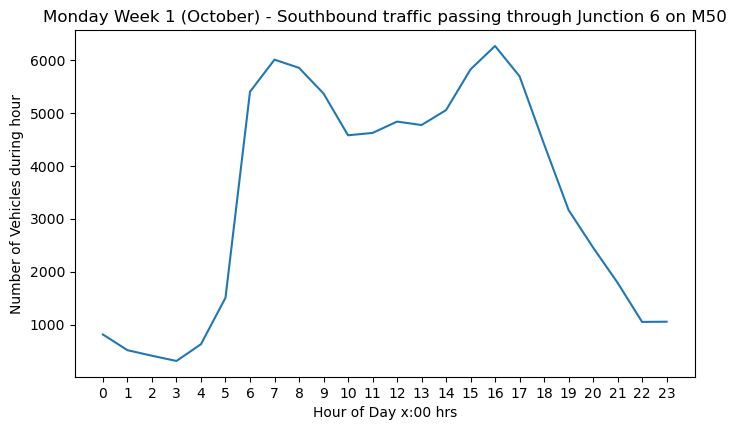

In [46]:
monday_wk1 = df.loc[(df['day'] == 'Mon') & (df['week'] == 1)]

plt.figure(figsize=(8, 4.5))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather than default interval of 5 hours
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

To get a better sense of what Southbound traffic levels might be like on a typical Monday, we can create a plot of the average volume of traffic during each hour of Monday, calculated over the four Mondays of the sample dataset:

In [47]:
# First we create a dataframe consisting only of rows where the data in the 'day' column is 'Mon'.

monday = df.loc[df['day'] == 'Mon']

print(monday)

# Next we use the groupby() function on this 'monday' dataframe to seperate the data by the contents of the 'hour' column. 
# This creates 24 groups of data from the 'monday' dataframe
# We then use the .mean method on the 'southbound' column within each of these groups to calculate the mean value (over 4 weeks)
# for southbound traffic for each hour of each day.

mean_mon_s_hourly = monday.groupby('hour')['southbound'].mean()

print()
print('The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_s_hourly)



     week  hour  day day_type  southbound  northbound  temp
0       1     0  Mon  weekday         812         461  10.2
1       1     1  Mon  weekday         515         266   9.8
2       1     2  Mon  weekday         410         283   9.5
3       1     3  Mon  weekday         311         546   9.4
4       1     4  Mon  weekday         629        1018   9.4
..    ...   ...  ...      ...         ...         ...   ...
523     4    19  Mon  weekday        3120        3266  10.9
524     4    20  Mon  weekday        2467        2094  10.9
525     4    21  Mon  weekday        1889        1475  11.0
526     4    22  Mon  weekday        1246        1066  11.2
527     4    23  Mon  weekday         842         753  10.9

[96 rows x 7 columns]

The average figure for southbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      905.75
1      563.50
2      430.00
3      315.25
4      604.25
5     1558.75
6     5407.50
7     5915.75
8     5717.75
9     5250.50
10    46

Next, we can work out which hour of Monday has the highest average traffic level over the four weeks, and what that traffic level is. We can use the fact the indices of the output of mean_mon_s_hourly have the same numeric value as the hours which they relate to (eg. index [7] relates to the hour beginning at 7:00).

In [48]:
max_row_mon_s_hourly = mean_mon_s_hourly.idxmax()
max_value_mon_s_hourly = mean_mon_s_hourly.max()
print(f'The maximum average hourly figure for Southbound traffic on Mondays is {max_value_mon_s_hourly} and this occurs during the hour starting at {max_row_mon_s_hourly}:00')

The maximum average hourly figure for Southbound traffic on Mondays is 5915.75 and this occurs during the hour starting at 7:00


Next, we can plot this average hourly traffic for Southbound traffic measured over four consecutive Mondays in October:

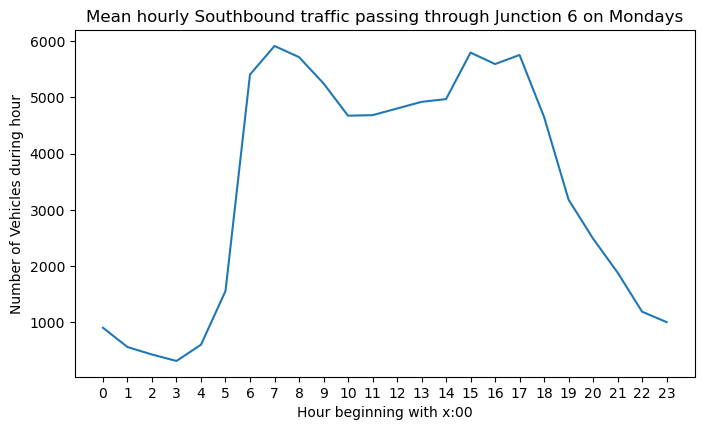

In [49]:
plt.figure(figsize=(8,4.5))   
plt.plot(mean_mon_s_hourly)
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      # seperate x-axis into 24 intervals rather than 5
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly Southbound traffic passing through Junction 6 on Mondays')
plt.show()

Next, we can plot the same kind of data but for Northbound traffic:

In [50]:
mean_mon_n_hourly = monday.groupby('hour')['northbound'].mean()

print()
print('The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: ')
print(mean_mon_n_hourly)

max_row_mon_n_hourly = mean_mon_n_hourly.idxmax()
max_value_mon_n_hourly = mean_mon_n_hourly.max()
print()
print()
print(f'The maximum average hourly figure for Northbound traffic on Mondays is {max_value_mon_n_hourly} and this occurs during the hour starting at {max_row_mon_n_hourly}:00.')


The average figure for Northbound traffic passing through Junction 6 during each hour on a Monday is: 
hour
0      479.50
1      279.25
2      281.75
3      545.25
4     1049.75
5     1592.75
6     3802.75
7     5749.50
8     5920.50
9     5293.00
10    4761.50
11    4703.75
12    4784.75
13    5042.00
14    5111.25
15    5979.25
16    6019.75
17    5959.00
18    5103.75
19    3293.50
20    2114.75
21    1495.50
22    1070.00
23     722.75
Name: northbound, dtype: float64


The maximum average hourly figure for Northbound traffic on Mondays is 6019.75 and this occurs during the hour starting at 16:00.


I will now generate a plot of the average hourly Northbound traffic for Mondays, including the plot for average hourly Southbound traffic on the same graph to allow for an easier comparison:

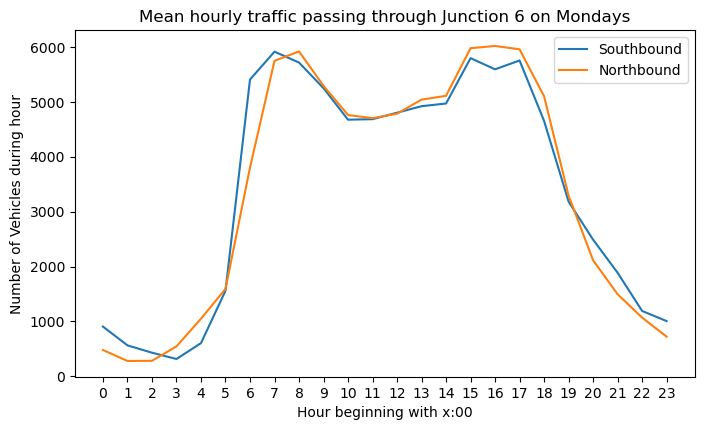

In [51]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_mon_s_hourly, label = 'Southbound')
plt.plot(mean_mon_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

This graph gives us a sense of which hours are the busiest and least busy on a Monday. To get a sense of how average traffic levels look for each other **weekday** we can plot similar graphs as the one above:

In [52]:
tuesday = df.loc[df['day'] == 'Tues']
wednesday = df.loc[df['day'] == 'Wed']
thursday = df.loc[df['day'] == 'Thurs']
friday = df.loc[df['day'] == 'Fri']
saturday = df.loc[df['day'] == 'Sat']
sunday = df.loc[df['day'] == 'Sun']

mean_tues_s_hourly = tuesday.groupby('hour')['southbound'].mean()
mean_wed_s_hourly = wednesday.groupby('hour')['southbound'].mean()
mean_thurs_s_hourly = thursday.groupby('hour')['southbound'].mean()
mean_fri_s_hourly = friday.groupby('hour')['southbound'].mean()
mean_sat_s_hourly = saturday.groupby('hour')['southbound'].mean()
mean_sun_s_hourly = sunday.groupby('hour')['southbound'].mean()

mean_tues_n_hourly = tuesday.groupby('hour')['northbound'].mean()
mean_wed_n_hourly = wednesday.groupby('hour')['northbound'].mean()
mean_thurs_n_hourly = thursday.groupby('hour')['northbound'].mean()
mean_fri_n_hourly = friday.groupby('hour')['northbound'].mean()
mean_sat_n_hourly = saturday.groupby('hour')['northbound'].mean()
mean_sun_n_hourly = sunday.groupby('hour')['northbound'].mean()

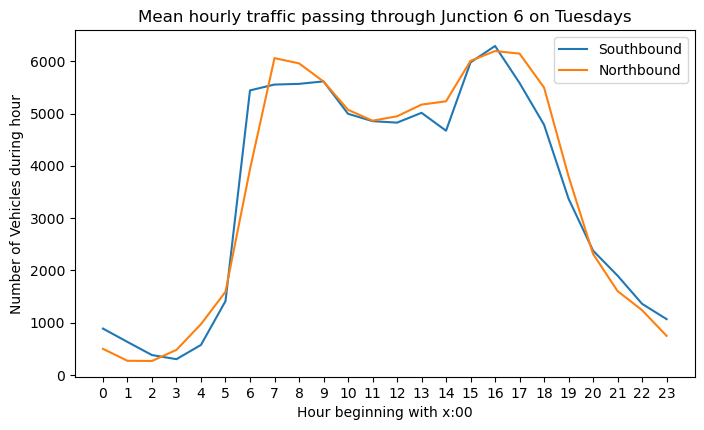

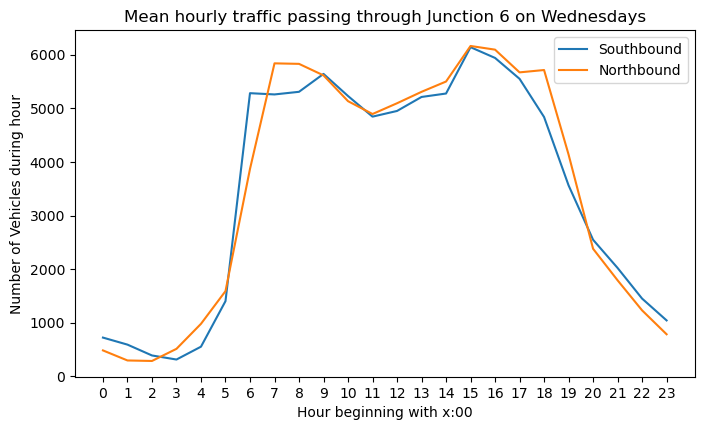

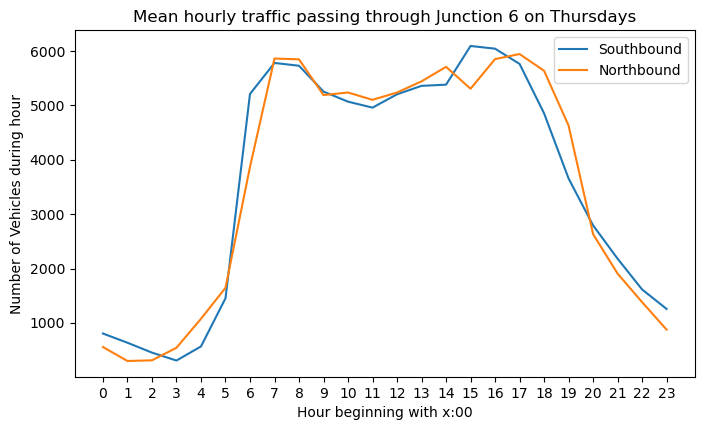

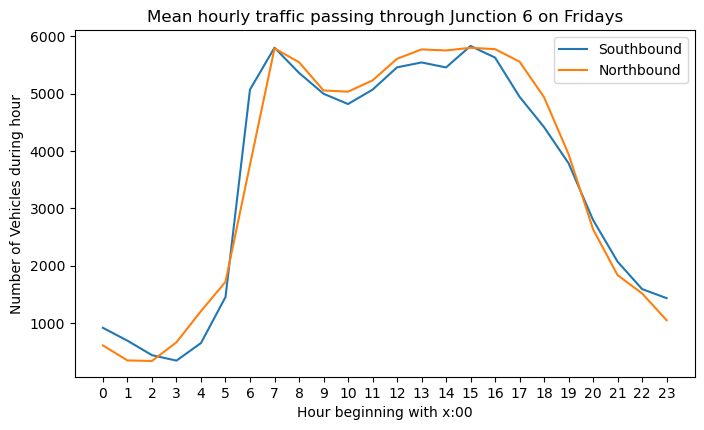

In [53]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_tues_s_hourly, label = 'Southbound')
plt.plot(mean_tues_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))      
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Tuesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_wed_s_hourly, label = 'Southbound')
plt.plot(mean_wed_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Wednesdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_thurs_s_hourly, label = 'Southbound')
plt.plot(mean_thurs_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Thursdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_fri_s_hourly, label = 'Southbound')
plt.plot(mean_fri_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))    
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Fridays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()



The distributions of hourly traffic for the two **weekend** days are as below:

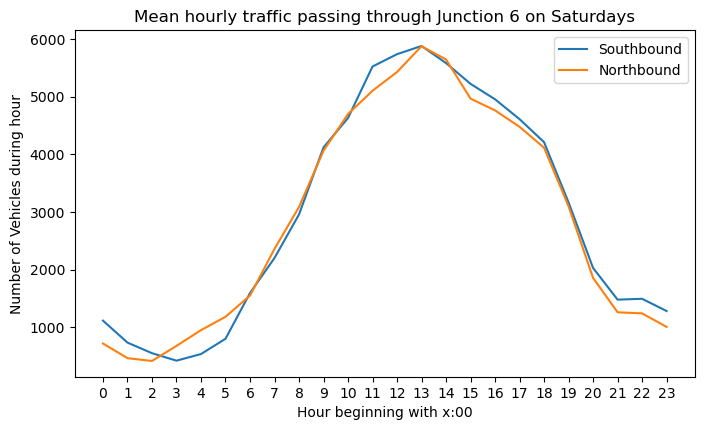

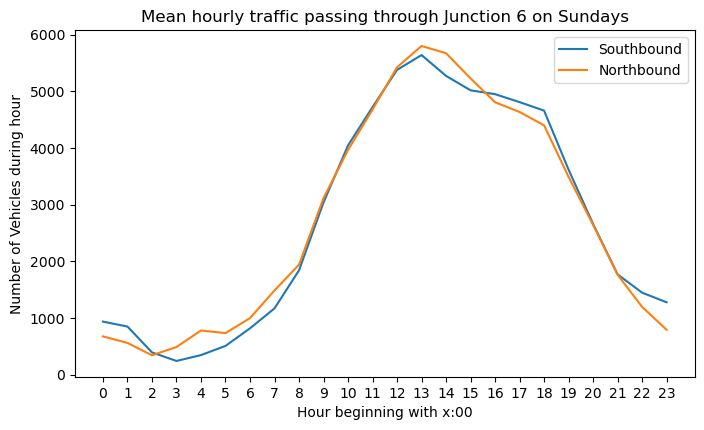

In [54]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_sat_s_hourly, label = 'Southbound')
plt.plot(mean_sat_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Saturdays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(mean_sun_s_hourly, label = 'Southbound')
plt.plot(mean_sun_n_hourly, label = 'Northbound')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Sundays')
plt.legend(["Southbound", "Northbound"], loc ="upper right")
plt.show()

As we did above for Monday's hourly data, we can get a sense of which hour is the busiest on average for each other day using the .max and .idxmax methods on the mean hourly data:

In [55]:
max_row_tues_s_hourly = mean_tues_s_hourly.idxmax()
max_value_tues_s_hourly = mean_tues_s_hourly.max()

max_row_tues_n_hourly = mean_tues_n_hourly.idxmax()
max_value_tues_n_hourly = mean_tues_n_hourly.max()

max_row_wed_s_hourly = mean_wed_s_hourly.idxmax()
max_value_wed_s_hourly = mean_wed_s_hourly.max()

max_row_wed_n_hourly = mean_wed_n_hourly.idxmax()
max_value_wed_n_hourly = mean_wed_n_hourly.max()

max_row_thurs_s_hourly = mean_thurs_s_hourly.idxmax()
max_value_thurs_s_hourly = mean_thurs_s_hourly.max()

max_row_thurs_n_hourly = mean_thurs_n_hourly.idxmax()
max_value_thurs_n_hourly = mean_thurs_n_hourly.max()

max_row_fri_s_hourly = mean_fri_s_hourly.idxmax()
max_value_fri_s_hourly = mean_fri_s_hourly.max()

max_row_fri_n_hourly = mean_fri_n_hourly.idxmax()
max_value_fri_n_hourly = mean_fri_n_hourly.max()

max_row_sat_s_hourly = mean_sat_s_hourly.idxmax()
max_value_sat_s_hourly = mean_sat_s_hourly.max()

max_row_sat_n_hourly = mean_sat_n_hourly.idxmax()
max_value_sat_n_hourly = mean_sat_n_hourly.max()

max_row_sun_s_hourly = mean_sun_s_hourly.idxmax()
max_value_sun_s_hourly = mean_sun_s_hourly.max()

max_row_sun_n_hourly = mean_sun_n_hourly.idxmax()
max_value_sun_n_hourly = mean_sun_n_hourly.max()

print(f'The maximum average hourly figure for Southbound traffic on Tuesdays is {max_value_tues_s_hourly} and this is expected to occur during the hour starting at {max_row_tues_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Wednesdays is {max_value_wed_s_hourly} and this is expected to occur during the hour starting at {max_row_wed_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Thursdays is {max_value_thurs_s_hourly} and this is expected to occur during the hour starting at {max_row_thurs_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Fridays is {max_value_fri_s_hourly} and this is expected to occur during the hour starting at {max_row_fri_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Saturdays is {max_value_sat_s_hourly} and this is expected to occur during the hour starting at {max_row_sat_s_hourly}:00')
print(f'The maximum average hourly figure for Southbound traffic on Sundays is {max_value_sun_s_hourly} and this is expected to occur during the hour starting at {max_row_sun_s_hourly}:00')
print()
print(f'The maximum average hourly figure for Northbound traffic on Tuesdays is {max_value_tues_n_hourly} and this is expected to occur during the hour starting at {max_row_tues_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Wednesdays is {max_value_wed_n_hourly} and this is expected to occur during the hour starting at {max_row_wed_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Thursdays is {max_value_thurs_n_hourly} and this is expected to occur during the hour starting at {max_row_thurs_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Fridays is {max_value_fri_n_hourly} and this is expected to occur during the hour starting at {max_row_fri_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Saturdays is {max_value_sat_n_hourly} and this is expected to occur during the hour starting at {max_row_sat_s_hourly}:00')
print(f'The maximum average hourly figure for Northbound traffic on Sundays is {max_value_sun_n_hourly} and this is expected to occur during the hour starting at {max_row_sun_s_hourly}:00')



The maximum average hourly figure for Southbound traffic on Tuesdays is 6293.75 and this is expected to occur during the hour starting at 16:00
The maximum average hourly figure for Southbound traffic on Wednesdays is 6143.25 and this is expected to occur during the hour starting at 15:00
The maximum average hourly figure for Southbound traffic on Thursdays is 6092.75 and this is expected to occur during the hour starting at 15:00
The maximum average hourly figure for Southbound traffic on Fridays is 5832.5 and this is expected to occur during the hour starting at 15:00
The maximum average hourly figure for Southbound traffic on Saturdays is 5881.75 and this is expected to occur during the hour starting at 13:00
The maximum average hourly figure for Southbound traffic on Sundays is 5639.0 and this is expected to occur during the hour starting at 13:00

The maximum average hourly figure for Northbound traffic on Tuesdays is 6196.5 and this is expected to occur during the hour starting a

We can see that at the broadest level of description, traffic in both directions during all five weekdays follows a roughly similar distribution: a first peak period between 6 am and 10 am, followed by a second peak period between 2 pm and 7 pm. 

Bearing in mind that the hours with the busiest traffic levels for Monday are 7:00 for Southbound (level is 5915.75 ) and 16:00 for Northbound (level is 6019.75), we can see that, in general:
- on weekdays, traffic levels peak between 3 and 5 pm, and peak traffic levels are slightly higher earlier in the week than later.
- on weekends, traffic levels peak at slightly lower levels than during the working week.

On Mondays, the busiest hour is between 7 and 8 am; perhaps this can be explained by additional people travelling back to Dublin for work and college on a Monday morning after having spent the weekend further away.

For weekends, we find a very different distribution than that found for weekdays; traffic on both days peaks during the hour of 13:00, which resonates with my past experiences of travelling to Blanchardstown shopping centre at this time. However, on Sunday evening we see a steadier fall off in the second half of the day; my guess is that this is due to people returning to their accomodation in Dublin following the weekend spent down the country etc.

When I create my simulated dataset later based on this dataset, we can check for the presence of these features there too.

### Standard deviations of hourly data ###

We can calculate the extent to which traffic data varied for each hour of the week, measured relative to the mean figures for each hour of the week. This generates floating point numbers which I will not round up, as I want the figures for standard deviation to be as accurate as possible when using them to simulate my dataset further on. To begin, I will calculate the standard deviations for Monday's hourly Southbound traffic.

In [56]:
std_mon_s_hourly = monday.groupby('hour')['southbound'].std()
print(std_mon_s_hourly)

hour
0       71.121375
1       53.319790
2       34.756294
3       15.585784
4       25.184321
5       51.292462
6       39.110953
7       92.791433
8      229.039116
9      298.221953
10     192.144694
11      83.969737
12      80.967071
13     113.485315
14      79.086451
15      40.816663
16    1099.581852
17     304.169224
18     446.802995
19      60.785826
20      32.263240
21      79.629873
22      97.984267
23     109.462322
Name: southbound, dtype: float64


Similar statistics for standard deviation can be calculated for hourly Southbound and Northbound traffic for each of the seven days of the week, over the four weeks studied; the code for calculating these (without printing) is as below:

In [57]:
std_tues_s_hourly = tuesday.groupby('hour')['southbound'].std()
std_wed_s_hourly = wednesday.groupby('hour')['southbound'].std()
std_thurs_s_hourly = thursday.groupby('hour')['southbound'].std()
std_fri_s_hourly = friday.groupby('hour')['southbound'].std()
std_sat_s_hourly = saturday.groupby('hour')['southbound'].std()
std_sun_s_hourly = sunday.groupby('hour')['southbound'].std()

std_mon_n_hourly = monday.groupby('hour')['northbound'].std()
std_tues_n_hourly = tuesday.groupby('hour')['northbound'].std()
std_wed_n_hourly = wednesday.groupby('hour')['northbound'].std()
std_thurs_n_hourly = thursday.groupby('hour')['northbound'].std()
std_fri_n_hourly = friday.groupby('hour')['northbound'].std()
std_sat_n_hourly = saturday.groupby('hour')['northbound'].std()
std_sun_n_hourly = sunday.groupby('hour')['northbound'].std()

### Distribution of Air Temperature data ###

I will plot air temperature for Monday of week 2, Wednesday of week 3 and Saturday of Week 4 to get a sense of what somewhat randomly selected daily air temperature data can look like. I have plotted them on separate graphs as I found it difficult to create a y-axis to capture the full temperature range.

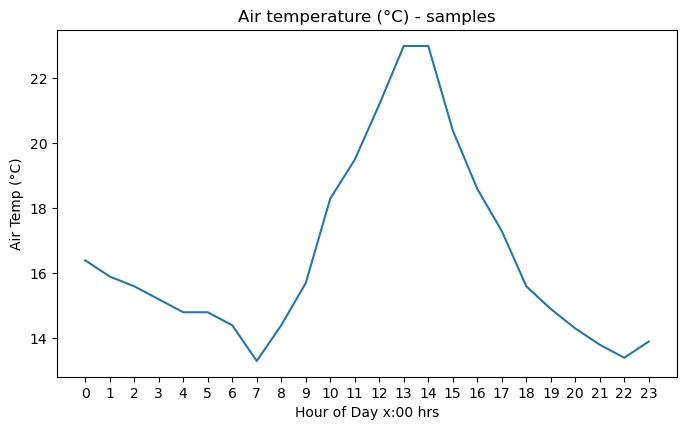

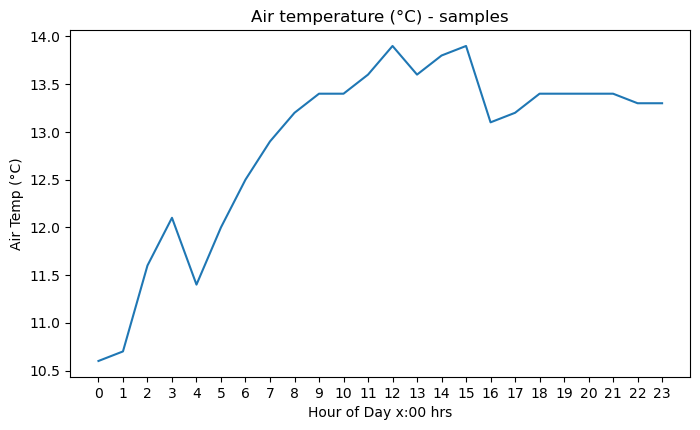

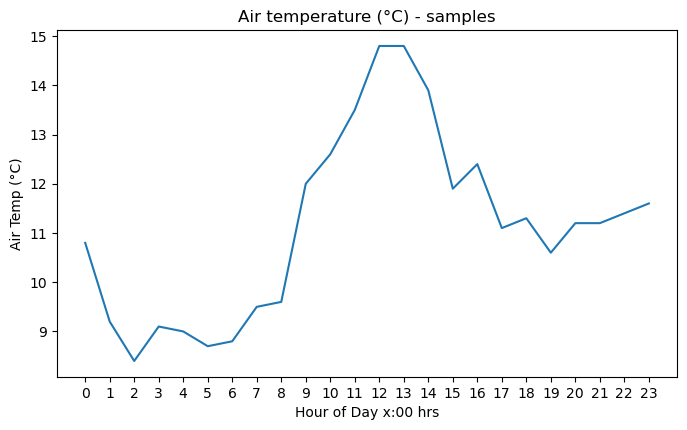

In [58]:
monday_wk2 = df.loc[(df['day'] == 'Mon') & (df['week'] == 2)]
wednesday_wk3 = df.loc[(df['day'] == 'Wed') & (df['week'] == 3)]
saturday_wk4 = df.loc[(df['day'] == 'Sat') & (df['week'] == 4)]

plt.figure(figsize=(8, 4.5))
plt.plot(monday_wk2['hour'], monday_wk2['temp'], label = "Mon week 2 temp")
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature (°C) - samples')
plt.show()


plt.figure(figsize=(8, 4.5))
plt.plot(wednesday_wk3['hour'], wednesday_wk3['temp'], label = "Wed week 3 temp")
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature (°C) - samples')
plt.show()

plt.figure(figsize=(8, 4.5))
plt.plot(saturday_wk4['hour'], saturday_wk4['temp'], label = "Sat week 2 temp")
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))
plt.ylabel('Air Temp (°C)')
plt.title('Air temperature (°C) - samples')
plt.show()


### Correlations between Southbound and Northbound traffic ###
We can get a picture of just how highly correlated southbound and northbound traffic volums are by using the np.corrcoef function. This measures hte Pearson's correlation coefficient. This is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. 

 Here we find an almost perfect correlation of r = 0.978 ie. whatever the volume of traffic is going in one direction during a certain time, there tends to be a similar volume of traffic at the same time going in the other direction.

In [59]:
# Here I used [0,1] to print only the entry in the top right corner of the correlation matrix.

corr_s_n = np.corrcoef(df['southbound'], df['northbound'])[0,1]
print(f'The Pearson correlation coefficient between Southbound and Northbound traffic is {round(corr_s_n, 3)}.')

The Pearson correlation coefficient between Southbound and Northbound traffic is 0.978.


In [60]:
#morning_rush = df.loc[(df['hour'] >= 6) & (df['hour'] <= 8) & (df['day'].isin(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']))]
#evening_rush = df.loc[(df['hour'] >= 15) & (df['hour'] <= 18) & (df['day'].isin(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']))]
#
#southbound_am_mean = morning_rush.groupby('day')['southbound'].mean()
#northbound_pm_mean = evening_rush.groupby('day')['northbound'].mean()
#
#print(southbound_am_mean)
#print()
#print(northbound_pm_mean)

#corr_rush_hour = np.corrcoef(southbound_am_mean, northbound_pm_mean)[0,1]

#print(corr_rush_hour)

### Correlations of traffic levels with Air Temperature (°C) ###

I was curious to test what relationship might exist between the weather and traffic levels. To test this, I obtained hourly weather information for the nearby Phoenix Park weather station for the month of October. 

I had initially hoped to test the relationship of rain levels to traffic, as I know from experience that driving on the m50 in heavy rainy is something that I would avoid if possible. However, I found that  most hours did not have any rainfall associated with them, and this meant it would be harder to draw a conclusion about the impact of rainfall on traffic levels. Instead, I decided to test the correlation between temperature levels (in degrees Celsisus) and traffic levels. 

In [61]:
corr_s_temp = np.corrcoef(df['southbound'], df['temp'])[0,1]

corr_n_temp = np.corrcoef(df['northbound'], df['temp'])[0,1]

print(round(corr_s_temp, 3))
print(round(corr_n_temp, 3))

0.336
0.34


This shows us that over the four weeks of October, there was a weak positive correlation between the level of traffic and air temperature for both Southbound and Northbound traffic.

To illustrate the relationships on a plot, we can create a plot with with two y-axes. Below is an investigation of the relationship for Monday of Week 1.

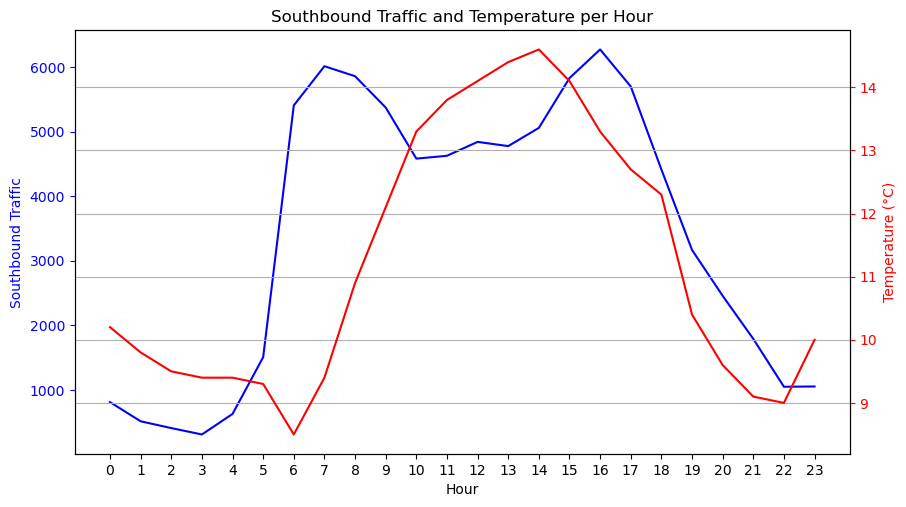

In [62]:
# this creates a plot which can potentially contain more than one plot
# https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin.

fig, ax1 = plt.subplots(figsize=(10, 5.5))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for southbound traffic on the primary y-axis
ax1.plot(monday_wk1['hour'], monday_wk1['southbound'], color='blue', label='Southbound Mon Wk 1')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Southbound Traffic', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature on seconday y-axis
ax2.plot(monday_wk1['hour'], monday_wk1['temp'], color='red', label='Temperature Mon Wk 1')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Southbound Traffic and Temperature per Hour')
plt.xticks(np.arange(24))   
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.show()

### Distribution of traffic for one hour over a week ###

I will now create plots to analyse how traffic levels during one hour of the day are distributed over the course of a week. I will choose the hour beginning at 07:00 for this and will start by analysing Southbound traffic levels at this hour for Week 1.

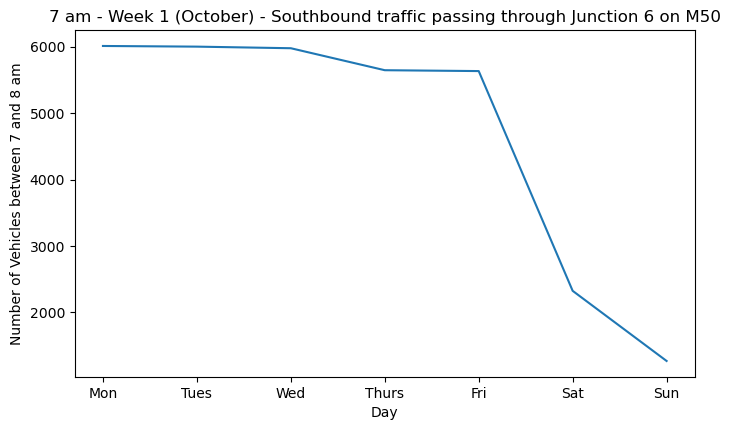

In [63]:
week1_7am = df.loc[(df['week'] == 1) & (df['hour'] == 7)]

plt.figure(figsize=(8,4.5))
plt.plot(week1_7am['day'], week1_7am['southbound'])
plt.xlabel('Day')
plt.ylabel('Number of Vehicles between 7 and 8 am')
plt.title('7 am - Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

I will now analyse the same data but taking the average values over the four weeks in the sample:

In [64]:
am7 = df.loc[df['hour'] == 7]

print(am7)

     week  hour    day day_type  southbound  northbound  temp
7       1     7    Mon  weekday        6013        5910   9.4
31      1     7   Tues  weekday        6003        6206  10.1
55      1     7    Wed  weekday        5979        6033  12.5
79      1     7  Thurs  weekday        5648        5733  13.3
103     1     7    Fri  weekday        5635        5877  17.5
127     1     7    Sat  weekend        2326        2410  16.3
151     1     7    Sun  weekend        1270        1520  11.8
175     2     7    Mon  weekday        5831        5904  13.3
199     2     7   Tues  weekday        5004        6024  15.7
223     2     7    Wed  weekday        5510        5612  10.4
247     2     7  Thurs  weekday        5844        5981   3.6
271     2     7    Fri  weekday        5835        5629   8.8
295     2     7    Sat  weekend        2303        2369   4.2
319     2     7    Sun  weekend        1096        1356   1.2
343     3     7    Mon  weekday        5977        5878   4.7
367     

In [65]:
mean_7am_s = am7.groupby('day')['southbound'].mean()

print(mean_7am_s)

day
Mon      5915.75
Tues     5555.75
Wed      5261.50
Thurs    5780.25
Fri      5802.75
Sat      2200.25
Sun      1170.00
Name: southbound, dtype: float64


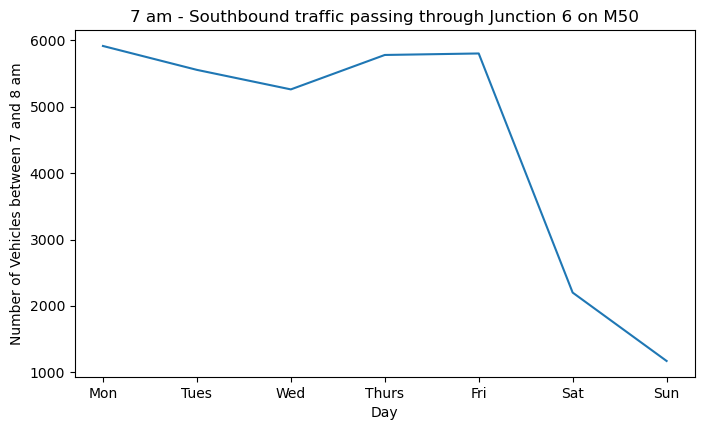

In [66]:
plt.figure(figsize=(8,4.5))
plt.plot(mean_7am_s)
plt.xlabel('Day')
plt.ylabel('Number of Vehicles between 7 and 8 am')
plt.title('7 am - Southbound traffic passing through Junction 6 on M50')
plt.show()

### Total traffic levels ###

In [67]:
total_mon_s_by_day = monday.groupby('week')['southbound'].sum()

total_s_by_day = df.groupby('week')['southbound'].sum()

print(total_s_by_day)



week
1    561926
2    560983
3    550064
4    555445
Name: southbound, dtype: int64


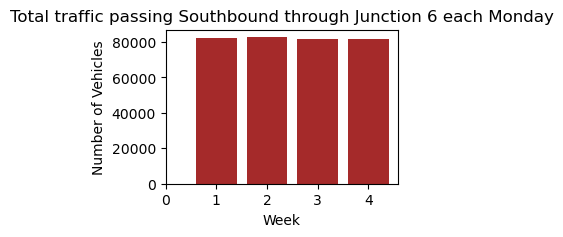

In [68]:
total_tues_s_by_day = tuesday.groupby('week')['southbound'].sum()
total_wed_s_by_day = wednesday.groupby('week')['southbound'].sum()
total_thurs_s_by_day = thursday.groupby('week')['southbound'].sum()
total_fri_s_by_day = friday.groupby('week')['southbound'].sum()
total_sat_s_by_day = saturday.groupby('week')['southbound'].sum()
total_sun_s_by_day = sunday.groupby('week')['southbound'].sum()


plt.figure(figsize=(3, 2))
plt.bar(total_mon_s_by_day.index, total_mon_s_by_day, color = 'brown')
plt.xlabel('Week')
plt.xticks(np.arange(5))     
plt.ylabel('Number of Vehicles')

plt.title('Total traffic passing Southbound through Junction 6 each Monday')
plt.show()

### Simulating data for a hypothetical week 5 ###

To create a synthetic dataset of weekly traffic data, I will use the mean and standard deviations for the hourly Southbound and Northbound data obtained above and use np.random to create a plausable set of datapoints for each day and hour.

I will then compare the distributions and properties of the synthetic dataset to the distributions obtained for the real data from Week 1 to Week 4.

I will first create synthetic hourly data for Monday Southbound traffic: to do this, I will generate a list of twenty-four normally distributed random numbers, each representing synthetic data for each hour. 

In [69]:
synth_mon_s_hourly = np.random.normal(loc=mean_mon_s_hourly, scale=std_mon_s_hourly, size=24)

# print(synthetic_mon_s_hourly)

df_synth_mon_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_mon_s_hourly, 'day': 'Mon'})

#noisy_df_synth_mon_s_hourly = pd.DataFrame({'hour': range(24), 'southbound': synth_mon_s_hourly**, 'day': 'Mon'})

# print(df_synth_mon_s_hourly)

# now can add noise to this dataframe

# noise = 5 
# df_synth_mon_s_hourly['southbound_with_noise'] = df_synth_mon_s_hourly['southbound'] + np.random.normal(loc=0, scale=noise, size=24)

#print(noisy_df_synth_mon_s_hourly)



    hour   southbound  day
0      0  1028.729747  Mon
1      1   568.520697  Mon
2      2   505.275119  Mon
3      3   372.725008  Mon
4      4   680.257912  Mon
5      5  1956.097230  Mon
6      6  6794.410177  Mon
7      7  7449.557962  Mon
8      8  6744.070468  Mon
9      9  6233.356464  Mon
10    10  5474.690848  Mon
11    11  5822.051894  Mon
12    12  5963.791145  Mon
13    13  6120.685092  Mon
14    14  6164.552614  Mon
15    15  7307.843927  Mon
16    16  7151.841076  Mon
17    17  7185.201688  Mon
18    18  5870.394867  Mon
19    19  4115.196091  Mon
20    20  3110.297921  Mon
21    21  2443.908634  Mon
22    22  1406.431641  Mon
23    23  1421.284514  Mon


Next, I will plot this synthetic ("Week 5") data alongside the actual Southbound hourly traffic data for Week 1 to see how the distributions compare:

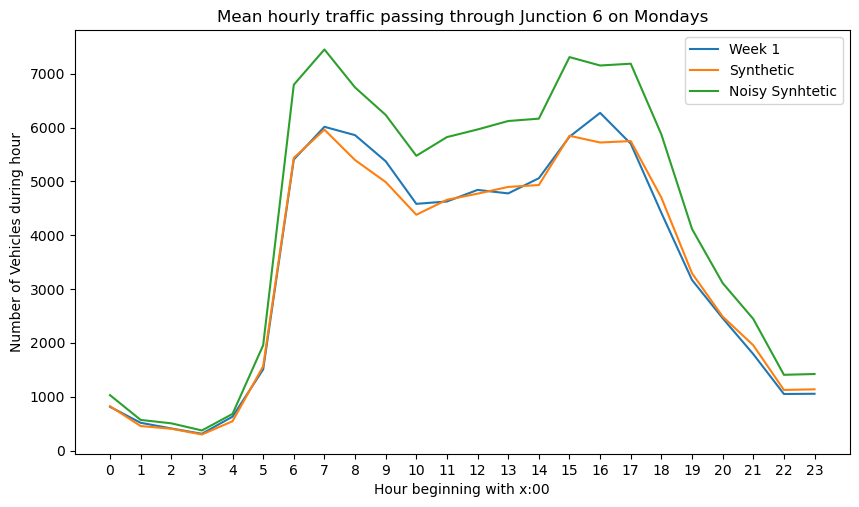

In [70]:
plt.figure(figsize=(10,5.5))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'], label = 'Week 1 Southbound')
plt.plot(df_synth_mon_s_hourly['hour'], df_synth_mon_s_hourly['southbound'], label = 'Synthetic (Week 5) Southbound')
plt.plot(noisy_df_synth_mon_s_hourly['hour'], noisy_df_synth_mon_s_hourly['southbound'], label = 'Synthetic with added noise')
plt.xlabel('Hour beginning with x:00')
plt.xticks(np.arange(24))     
plt.ylabel('Number of Vehicles during hour')
plt.title('Mean hourly traffic passing through Junction 6 on Mondays')
plt.legend(["Week 1", "Synthetic", "Noisy Synhtetic"], loc ="upper right")
plt.show()

We can see that the synthetic data matches the actual data for Week 1 very closely, except at the hour of 4 pm, which seems to be caused by the large figure for standard deviation for that hour on Mondays (and this in turn was .caused by a much lower volume of traffic at that hour during Week 3 compared with the other three weeks)

### References ###